In [1]:
import string, re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(0)

import warnings
warnings.simplefilter('ignore')

In [2]:
# df2 = pd.read_csv('job_scrapped_2.csv')
df = pd.read_csv('job_scrapped.csv')
df.head()

,Title,Company,Link,Review,Salary,Description
0,Front End Developer ( Angular ),HP,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,4.0,None,"At HP, talent is our criteria. Join us in rein..."
1,ECM Developer,NetApp,https://in.indeed.com/rc/clk?jk=2af5c0e9f9acb3...,4.1,None,Job Summary\n\nAs a Programmer Analyst 3 you a...
2,"Developer 2, Microstrategy",Alliance Data,https://in.indeed.com/rc/clk?jk=12bdf50d683198...,3.6,None,It's fun to work in a company where people tru...
3,Odoo software developer,Charis Software,https://in.indeed.com/rc/clk?jk=21da11b38fc05a...,None,None,Overview:\nWe are looking for a skilled Odoo s...
4,Backend Developer,SatSure Analytics India Private Limited,https://in.indeed.com/company/SatSure-Analytic...,None,"₹6,00,000 a year",Responsibilities Include:\nCollaborating with ...


## Analysis

In [3]:
df2 = df.copy()

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        132 non-null    object
 1   Company      132 non-null    object
 2   Link         132 non-null    object
 3   Review       132 non-null    object
 4   Salary       132 non-null    object
 5   Description  132 non-null    object
dtypes: object(6)
memory usage: 6.3+ KB


In [5]:
df2.Title.unique()

array(['Front End Developer ( Angular )', 'ECM Developer',
       'Developer 2, Microstrategy', 'Odoo software developer',
       'Backend Developer', 'Machine Learning Developer',
       'Java/J2EE Developer', 'Senior JavaScript Developer',
       'JAVA Backend Developer_Chennai (Experience- 4 to 10years)',
       'Technical Specialist', 'JavaScript Developer(WEB-UI)',
       'Java Back End Developer', 'Front End Developer', 'PHP Fresher',
       'IOS Developer', 'Salesforce Commerce Cloud Developer',
       'Node js developer', 'PHP Developer (intern)',
       'Senior Software Engineer', 'Python/Django Developer',
       'Engineering & Architecture - Full Stack Developer - VP - Ben...',
       'FULL STACK JAVA DEVELOPER', 'Principal Application Developer',
       'PHP Laravel Developer', 'Dev Ops Manager',
       'Python Django / Azure Application Developer (Mid-Senior Cons...',
       'Java Developer',
       'Full Stack Azure Application Developer (Mid-Senior Consultan...',
       

In [6]:
df2.Company.unique()

array(['HP', 'NetApp', 'Alliance Data', 'Charis Software',
       'SatSure Analytics India Private Limited', 'Punchh',
       'Sminetech Solutions Pvt Ltd', 'Dassault Systèmes',
       'Infoway Group', 'NI Network Infrastructure',
       'eifer software solutions', 'Omnicuris Healthcare Pvt Ltd',
       'RyDigi E-Commerce', 'Fermion Infotech Private Limited',
       'SemiDot Infotech', 'Merkle Sokrati',
       'Techflinch Infotech PVT. LTD',
       'Vedhas Technology Solutions Pvt Ltd', 'Sarathi Softech Pvt Ltd',
       'Stunntech Innovations', 'JPMorgan Chase Bank, N.A.', 'DIS-HR',
       'Oracle', 'BINALYTO DATA SERVICES PVT. LTD.', 'Vedhas Resources',
       'People Interactive Pvt Ltd.', 'ERM Group', 'AIT TECHNOLOGIES',
       'Flexi Ventures Private Limited',
       'Codeclouds IT Solutions Pvt. Ltd',
       'Webomaze Technologies Pvt Ltd',
       'eBizneeds Business Solutions Private Limited',
       'Industrial Growth Analytik Info Techniqs',
       'Quess IT Staffing (Formerly 

In [7]:
df2.Salary.unique()

array(['None', '₹6,00,000 a year', '₹3,50,000 - ₹5,00,000 a year',
       '₹4,00,000 - ₹10,00,000 a year', '₹10,00,000 - ₹12,00,000 a year',
       '₹10,000 - ₹12,000 a month', '₹2,00,000 a year',
       '₹10,000 - ₹20,000 a month', '₹8,00,000 - ₹16,00,000 a year',
       '₹12,844 - ₹40,902 a month', '₹15,000 a month',
       '₹20,000 - ₹40,000 a month', '₹2,73,870 - ₹12,74,484 a year',
       '₹3,60,000 - ₹5,00,000 a year', '₹15,000 - ₹70,000 a month',
       '₹4,00,000 - ₹6,50,000 a year', '₹10,000 a month',
       '₹30,000 - ₹45,000 a month'], dtype=object)

In [8]:
# salary_df = df2[df2['Salary']!= 'None']
salary_df =df2.replace('None',0) # fill all none value with 0
salary_df.shape

(132, 6)

In [9]:
salary_df.head()

,Title,Company,Link,Review,Salary,Description
0,Front End Developer ( Angular ),HP,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,4.0,0,"At HP, talent is our criteria. Join us in rein..."
1,ECM Developer,NetApp,https://in.indeed.com/rc/clk?jk=2af5c0e9f9acb3...,4.1,0,Job Summary\n\nAs a Programmer Analyst 3 you a...
2,"Developer 2, Microstrategy",Alliance Data,https://in.indeed.com/rc/clk?jk=12bdf50d683198...,3.6,0,It's fun to work in a company where people tru...
3,Odoo software developer,Charis Software,https://in.indeed.com/rc/clk?jk=21da11b38fc05a...,0,0,Overview:\nWe are looking for a skilled Odoo s...
4,Backend Developer,SatSure Analytics India Private Limited,https://in.indeed.com/company/SatSure-Analytic...,0,"₹6,00,000 a year",Responsibilities Include:\nCollaborating with ...


In [10]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        132 non-null    object
 1   Company      132 non-null    object
 2   Link         132 non-null    object
 3   Review       132 non-null    object
 4   Salary       132 non-null    object
 5   Description  132 non-null    object
dtypes: object(6)
memory usage: 6.3+ KB


In [11]:
salary_list = salary_df['Salary'].unique().tolist()

### Adjust Hourly and Daily Salary to Yearly

In [12]:

def salary_base(x):
    y=""
    if "year" in str(x):
        y = "Yearly"
    if "hour" in str(x):
        y = "Hourly"
    if "day" in str(x):
        y = "Daily"
    elif "month" in str(x):
        y = "Monthly"
    
    return y

In [13]:
salary_df['Rate_by'] = salary_df['Salary'].apply(salary_base)

In [14]:
salary_df = salary_df[salary_df['Rate_by']!=""]
salary_df = salary_df.reset_index(drop=True)

In [15]:
salary_df.groupby('Rate_by').Salary.count()

Rate_by
Monthly    28
Yearly     30
Name: Salary, dtype: int64

In [16]:
salary_df.shape

(58, 7)

## Split the cell and use regular expression to identify only numbers.

In [17]:
a = "₹6,00,000 a year" 
# b = "From $10,00,000 a year a year" 

pattern = '\₹[0-9]*[.,]?[0-9]*[.,]?[0-9][.,]?[0-9][.,]?[0-9]'
p = re.compile(pattern)
digits = p.findall(a)
print(digits)

['₹6,00,000']


In [18]:
salary_df[['low','high']] = salary_df.Salary.str.split('-', expand=True)
salary_df[['Rate_by','low','high']]

,Rate_by,low,high
0,Yearly,"₹6,00,000 a year",None
1,Yearly,"₹3,50,000","₹5,00,000 a year"
2,Yearly,"₹4,00,000","₹10,00,000 a year"
3,Yearly,"₹10,00,000","₹12,00,000 a year"
4,Monthly,"₹10,000","₹12,000 a month"
5,Yearly,"₹2,00,000 a year",None
6,Monthly,"₹10,000","₹20,000 a month"
7,Yearly,"₹8,00,000","₹16,00,000 a year"
8,Monthly,"₹12,844","₹40,902 a month"
9,Monthly,"₹15,000 a month",None


In [19]:
salary_df.replace(to_replace=[None], value=0, inplace=True)

In [20]:
def find_salary(a):
    if a:
        pattern = '\₹[0-9]*[.,]?[0-9]*[.,]?[0-9][.,]?[0-9][.,]?[0-9]'
        p = re.compile(pattern)
        digits = p.findall(a)
        new1 = digits[0].replace("₹","")
        new2 = new1.replace(",","")
        
        return float(new2)
    else:
        return 0

In [21]:
salary_df['min'] = salary_df['low'].apply(find_salary)

In [22]:
salary_df['max'] = salary_df['high'].apply(find_salary)

In [23]:
salary_df.head()

,Title,Company,Link,Review,Salary,Description,Rate_by,low,high,min,max
0,Backend Developer,SatSure Analytics India Private Limited,https://in.indeed.com/company/SatSure-Analytic...,0,"₹6,00,000 a year",Responsibilities Include:\nCollaborating with ...,Yearly,"₹6,00,000 a year",0,600000.0,0.0
1,Java/J2EE Developer,Sminetech Solutions Pvt Ltd,https://in.indeed.com/rc/clk?cmp=Sminetech-Sol...,0,"₹3,50,000 - ₹5,00,000 a year",Your Responsibilities:\nWrite maintainable/sca...,Yearly,"₹3,50,000","₹5,00,000 a year",350000.0,500000.0
2,JavaScript Developer(WEB-UI),eifer software solutions,https://in.indeed.com/company/eifer-software-s...,0,"₹4,00,000 - ₹10,00,000 a year",JavaScript Developer(WEB-UI)\nLooking for a fr...,Yearly,"₹4,00,000","₹10,00,000 a year",400000.0,1000000.0
3,Java Back End Developer,Omnicuris Healthcare Pvt Ltd,https://in.indeed.com/company/Omnicuris-Health...,1.0,"₹10,00,000 - ₹12,00,000 a year",POSITION – JAVA BACK END DEVELOPER\nOmnicuris ...,Yearly,"₹10,00,000","₹12,00,000 a year",1000000.0,1200000.0
4,PHP Fresher,Fermion Infotech Private Limited,https://in.indeed.com/company/Fermion-Infotech...,0,"₹10,000 - ₹12,000 a month","Hi,\nWe are pleased to inform you that we have...",Monthly,"₹10,000","₹12,000 a month",10000.0,12000.0


## Calculate the adjusted salary (turn all daily/hourly wage to yearly), use average

In [24]:
#Calculate average salary
def adjust_salary(a, b):
    adjusted_salary=[]
    for x, y in zip(a,b):
        if y > 0:
            avg_salary = (x+y)/2
        
        else:
            avg_salary = x
            
        adjusted_salary.append(avg_salary)
        
    return adjusted_salary

In [25]:
salary_df['adjusted_salary'] = adjust_salary(salary_df['min'], salary_df['max'])

In [26]:

#turn hourly, daily and monthly wage to yearly 
def adjust_salary2(m,n):
    adjusted_yearly_salary = []
    for x, y in zip(m,n):
        if x == "Yearly":
            yearly_salary = y
        if x == "Monthly":
            yearly_salary = y*12
        if x == "Hourly":
            yearly_salary = y*40*52
        if x == "Daily":
            yearly_salary = y*5*52
            
        adjusted_yearly_salary.append(yearly_salary)
        
    return adjusted_yearly_salary

In [27]:
salary_df['adjusted_yearly_salary'] = adjust_salary2(salary_df['Rate_by'], salary_df['adjusted_salary'])

In [28]:
BINS = [0,60000,120000,500000,1000000,1500000,2800000]
salary_df['Salary_Bins'] = pd.cut(x=salary_df['adjusted_yearly_salary'], bins=BINS, labels=False)

<AxesSubplot:xlabel='Salary_Bins', ylabel='count'>

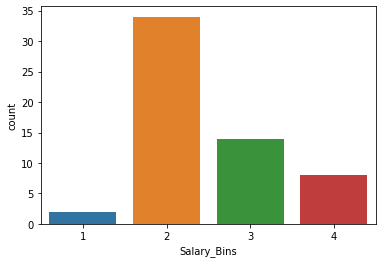

In [29]:
sns.countplot(salary_df.Salary_Bins)

array([[<AxesSubplot:title={'center':'adjusted_yearly_salary'}>]],
      dtype=object)

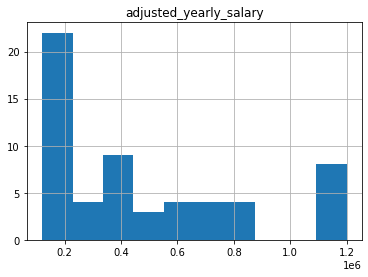

In [30]:
salary_df.hist('adjusted_yearly_salary')

In [31]:
salary_df['adjusted_yearly_salary'].quantile(list(np.linspace(0,1,7)))

0.000000     120000.0
0.166667     180000.0
0.333333     200000.0
0.500000     360000.0
0.666667     600000.0
0.833333     774177.0
1.000000    1200000.0
Name: adjusted_yearly_salary, dtype: float64

In [32]:
salary_df.columns

Index(['Title', 'Company', 'Link', 'Review', 'Salary', 'Description',
       'Rate_by', 'low', 'high', 'min', 'max', 'adjusted_salary',
       'adjusted_yearly_salary', 'Salary_Bins'],
      dtype='object')

In [33]:
salary_df.head(2)

,Title,Company,Link,Review,Salary,Description,Rate_by,low,high,min,max,adjusted_salary,adjusted_yearly_salary,Salary_Bins
0,Backend Developer,SatSure Analytics India Private Limited,https://in.indeed.com/company/SatSure-Analytic...,0,"₹6,00,000 a year",Responsibilities Include:\nCollaborating with ...,Yearly,"₹6,00,000 a year",0,600000.0,0.0,600000.0,600000.0,3
1,Java/J2EE Developer,Sminetech Solutions Pvt Ltd,https://in.indeed.com/rc/clk?cmp=Sminetech-Sol...,0,"₹3,50,000 - ₹5,00,000 a year",Your Responsibilities:\nWrite maintainable/sca...,Yearly,"₹3,50,000","₹5,00,000 a year",350000.0,500000.0,425000.0,425000.0,2


In [34]:
salary_df.shape

(58, 14)

### Combaine Title and Description

In [35]:
salary_df['combined_text'] = salary_df['Title'].str.cat(salary_df['Description'], sep = ' ')

In [36]:
salary_df.head(2)

,Title,Company,Link,Review,Salary,Description,Rate_by,low,high,min,max,adjusted_salary,adjusted_yearly_salary,Salary_Bins,combined_text
0,Backend Developer,SatSure Analytics India Private Limited,https://in.indeed.com/company/SatSure-Analytic...,0,"₹6,00,000 a year",Responsibilities Include:\nCollaborating with ...,Yearly,"₹6,00,000 a year",0,600000.0,0.0,600000.0,600000.0,3,Backend Developer Responsibilities Include:\nC...
1,Java/J2EE Developer,Sminetech Solutions Pvt Ltd,https://in.indeed.com/rc/clk?cmp=Sminetech-Sol...,0,"₹3,50,000 - ₹5,00,000 a year",Your Responsibilities:\nWrite maintainable/sca...,Yearly,"₹3,50,000","₹5,00,000 a year",350000.0,500000.0,425000.0,425000.0,2,Java/J2EE Developer Your Responsibilities:\nWr...


### Rearrange Columns 

In [37]:
salary_df = salary_df[['Title', 'Company', 'Link', 'Review', 'Salary', 'Description',
       'Rate_by', 'low', 'high', 'min', 'max', 'adjusted_salary',
       'adjusted_yearly_salary',  'combined_text','Salary_Bins']]

In [38]:
#salary_df.to_csv('job_scrapped_preprocess.csv',index=False)